# Intermediate Regression with statsmodels in Python

## Chapter 3: Multiple Linear Regression

In [2]:
import numpy as np
import pandas as pd
from itertools import product
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [11]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=taiwan_real_estate["n_convenience"],
            y=np.sqrt(taiwan_real_estate["dist_to_mrt_m"]),
            z=taiwan_real_estate["price_twd_msq"],
            mode="markers",
            marker=dict(
                color=taiwan_real_estate["price_twd_msq"]
            )
        )
    ]
)
fig.update_layout(
    width=800,
    height=800,
    scene=dict(
        xaxis_title="n_convenience",
        yaxis_title="sqrt_dist_to_mrt_m",
        zaxis_title="price_twd_msq"
    )
)
fig.show()

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



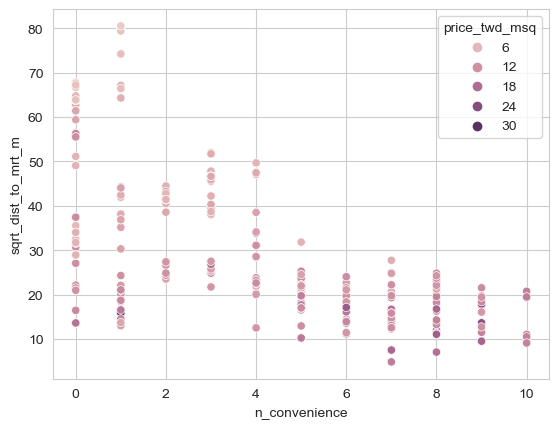

In [12]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(data=taiwan_real_estate, x="n_convenience", y="sqrt_dist_to_mrt_m", hue="price_twd_msq")

# Show the plot
plt.show()

In [13]:
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

Intercept             15.103790
n_convenience          0.214221
sqrt_dist_to_mrt_m    -0.157300
dtype: float64


In [14]:
from itertools import product

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience, sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq=mdl_price_vs_conv_dist.predict(explanatory_data)
)

# See the result  
print(prediction_data)

    n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0               0                   0      15.103790
1               0                  10      13.530787
2               0                  20      11.957784
3               0                  30      10.384781
4               0                  40       8.811778
..            ...                 ...            ...
94             10                  40      10.953984
95             10                  50       9.380981
96             10                  60       7.807978
97             10                  70       6.234975
98             10                  80       4.661972

[99 rows x 3 columns]


E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and w

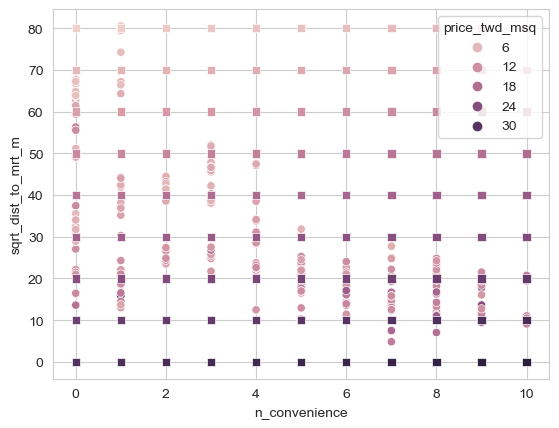

In [15]:
# Create scatter plot of taiwan_real_estate
sns.scatterplot(y="sqrt_dist_to_mrt_m", x="n_convenience", hue="price_twd_msq", data=taiwan_real_estate)

# Create scatter plot of prediction_data without legend
sns.scatterplot(y="sqrt_dist_to_mrt_m", x="n_convenience", marker="s", hue="price_twd_msq", legend=False,
                data=prediction_data)

# Show the plot
plt.show()

 The prediction grid confirms that your model is a good fit: prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and w

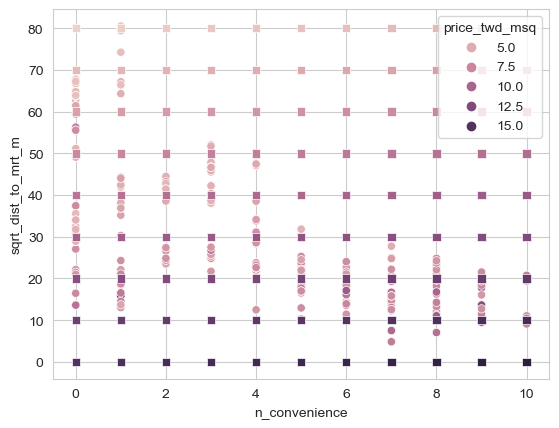

In [16]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and w

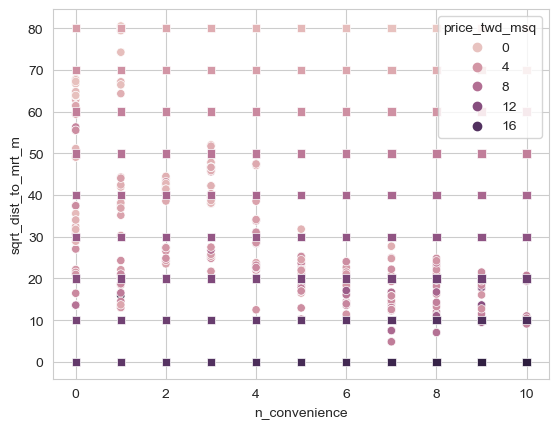

In [17]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + n_convenience:sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

Although the predictions from the model are different now that the interaction is included, the code to create them is the same. The resulting prediction grid is not much different from the model without an interaction.

In [20]:
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m
0,84.87882,10,30 to 45,11.467474,9.212970
1,306.59470,9,15 to 30,12.768533,17.509846
2,561.98450,5,0 to 15,14.311649,23.706212
3,561.98450,5,0 to 15,16.580938,23.706212
4,390.56840,5,0 to 15,13.040847,19.762803
...,...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607,63.890649
410,90.45606,9,0 to 15,15.128593,9.510839
411,390.96960,7,15 to 30,12.284418,19.772951
412,104.81010,5,0 to 15,15.885023,10.237680


E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Anaconda3\envs\dc-statistics\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and w

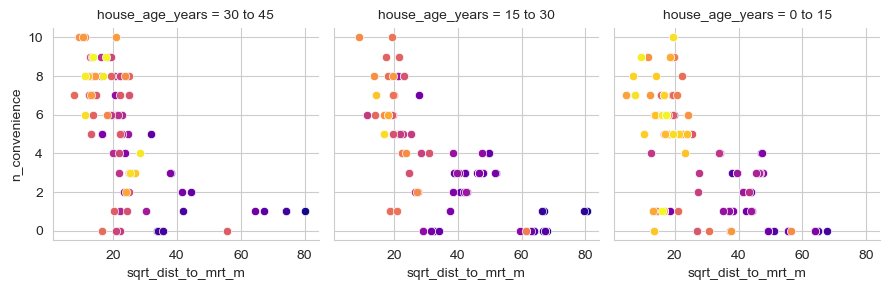

In [21]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
                     col="house_age_years",
                     hue="price_twd_msq",
                     palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         "sqrt_dist_to_mrt_m",
         "n_convenience")

# Show the plot (brighter colors mean higher prices)
plt.show()

The plot shows the same as before: house price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.

In [22]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + 0", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

house_age_years[0 to 15]     15.474464
house_age_years[15 to 30]    14.130059
house_age_years[30 to 45]    13.765494
n_convenience                 0.257666
sqrt_dist_to_mrt_m           -0.148102
dtype: float64


In [23]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years * 0", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

Intercept                                                       16.046849
house_age_years[T.15 to 30]                                     -2.286784
house_age_years[T.30 to 45]                                     -3.958077
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [24]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols("price_twd_msq ~ (n_convenience + sqrt_dist_to_mrt_m + house_age_years)**2 + 0", data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience:sqrt_dist_to_mrt_m                  -0.008956
dtype: float64


In [25]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m", "house_age_years"])

# See the result
print(explanatory_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years
0                0                   0        30 to 45
1                0                   0        15 to 30
2                0                   0         0 to 15
3                0                  10        30 to 45
4                0                  10        15 to 30
..             ...                 ...             ...
292             10                  70        15 to 30
293             10                  70         0 to 15
294             10                  80        30 to 45
295             10                  80        15 to 30
296             10                  80         0 to 15

[297 rows x 3 columns]


In [26]:
# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data))


# See the result
print(prediction_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0                   0        30 to 45      12.088773
1                0                   0        15 to 30      13.760066
2                0                   0         0 to 15      16.046849
3                0                  10        30 to 45      11.072148
4                0                  10        15 to 30      12.496811
..             ...                 ...             ...            ...
292             10                  70        15 to 30       0.900864
293             10                  70         0 to 15       2.515561
294             10                  80        30 to 45       5.179415
295             10                  80        15 to 30      -1.583811
296             10                  80         0 to 15       0.046831

[297 rows x 4 columns]


In [27]:
x_actual = taiwan_real_estate["n_convenience"]
y_actual = taiwan_real_estate["price_twd_msq"]

# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_actual and y_pred
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

In [28]:
# Test the function with intercept 10 and slope 1
print(calc_sum_of_squares([10, 1]))

7667.734402786995


In [30]:
from scipy.optimize import minimize

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0,0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4717.68623992569
        x: [ 8.224e+00  7.981e-01]
      nit: 5
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 3.547e-03 -5.713e-04]
            [-5.713e-04  1.395e-04]]
     nfev: 21
     njev: 7
Intercept        8.224237
n_convenience    0.798080
dtype: float64
